> **Summary** This report examines how non-Bellabeat smart device usage trends can inform Bellabeat's marketing strategy. The analysis is based on a publicly available Fitbit dataset collected in 2016, which, despite its limitations (small sample size, outdated, and lacking key demographic details), provides insights into users’ physical activity patterns. Exploratory analysis revealed strong correlations between TotalSteps and TotalDistance, as well as between active and walking minutes. Additionally, weekday trends indicate higher engagement mid-week, and statistical tests confirmed significant differences between weekday and weekend usage patterns.



# **About BellaBeat**

Founded in 2013 by Urška Sršen and Sando Mur, Bellabeat is a high-tech company that creates health-focused smart products for women. Combining art and technology, the company empowers women by providing insights into their health through data on activity, sleep, stress, and reproductive health. Since its rapid growth and global expansion by 2016, Bellabeat has launched multiple products available through online retailers and its e-commerce platform, emphasizing digital marketing strategies like Google Search and social media engagement to reach consumers effectively.

 **Scenario**

Urška Sršen sees an opportunity for growth by analyzing consumer data. She has assigned the marketing analytics team to analyse smart device usage data to gain insight into how consumers use non-Bellabeat smart devices. The aim is to identify trends and insights that can inform the company’s marketing strategy. Sršen expects the team to provide high-level recommendations based on their findings, helping Bellabeat enhance its offerings and strengthen its position in the wellness market for women.

# Ask phase

**Bussines task**
* Analysing smart device usage data to gain insight into how consumers use non-Bellabeat smart devices.
* High-level recommendations for how costumer behaviour in using smart devices trends can inform Bellabeat marketing strategy.

**Stakeholders**

* Urška Sršen - Bellabeat cofounder and Chief Creative Officer
* Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team
* Bellabeat Marketing Analytics team
  
# Prepare phase

**Data used**

I'm using FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from thirty fitbit users, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.
I'm using the daily data provided as well as heart rate seconds data.
These datasets were generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016 (31 days).
Sleep and weight data are not complete. There are some data missing. So first I will focus on the other data availabe. I will work on the DailyActivity.csv file containg Id, Activity Date, Total Steps, Active Minutes and distance and Calories.

**Data integrity and credibility**

The dataset, collected in 2016, is outdated and may not accurately reflect current health behaviors. The small sample size (30 participants) is not representative of the general female population, and key factors like age, diet, and health conditions are missing. Also, the data have been collected for just 31 days. Due to these limitations, the data lacks reliability and validity for making strong business recommendations. The analysis should be supplemented with more extensive and up-to-date data.

ROCCC System Evaluation:
* Reliability: Low—small, non-representative sample.
* Originality: Low—third-party data source.
* Comprehensiveness: Low—lacks key demographic details.
* Currency: Low—data is seven years old.
* Citation: Low—unverified third-party source.

# Process phase

I will focus my analysis in Python due to the accessibility, amount of data and to be able to create data visualization to share my results with stakeholders.

**Setting up the environment**

I will use the following packages for my analysis:

* numpy 
* pandas 
* matplotlib.pyplot
* seaborn

Model:
* sklearn.metrics
* sklearn.preprocessing
* sklearn.model_selection
* sklearn.preprocessing
* sklearn.metrics
* sklearn.svm
* sklearn.naive_bayes
* sklearn.neighbors
* sklearn.tree
* sklearn.ensemble
* sklearn.linear_model


**Import Library**


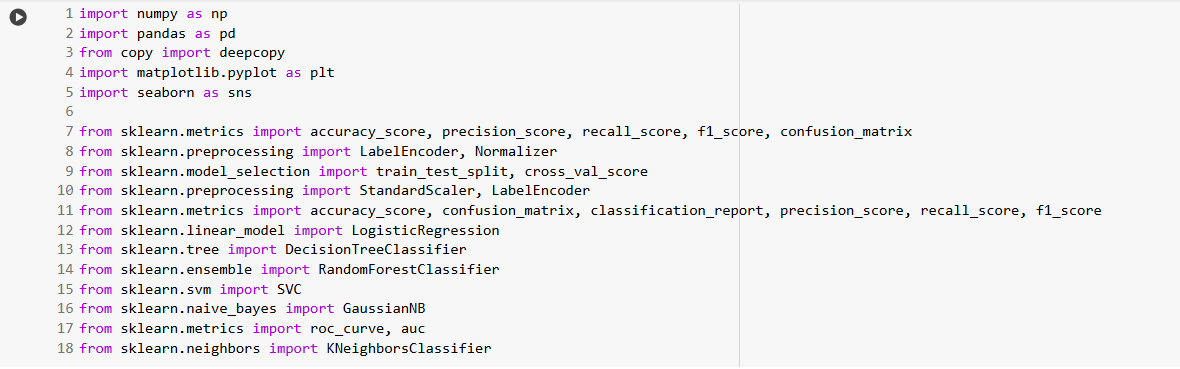

**Link BigQuerry to Python and call dataframe**


In [ ]:
# install package and link bigquerry to Python then call DataFrame to work with
pip install google-cloud-bigquery

from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# Set your Google Cloud Project ID
project_id = 'nimble-augury-451513-n3'

from google.cloud import bigquery
import pandas as pd

# Create a BigQuery client
client = bigquery.Client(project=project_id)

# Table Activities
query = """
          SELECT * 
          FROM `nimble-augury-451513-n3.FitnessProject.DailyActivities`         
        """

query_job = client.query(query)
df_Activities = query_job.to_dataframe()
df_Activities

# Table Time Sleep
query2 = """
          SELECT * 
          FROM `nimble-augury-451513-n3.FitnessProject.SleepDay`         
        """

query_job2 = client.query(query2)
df_TimeSleep = query_job2.to_dataframe()
df_TimeSleep

**Images**

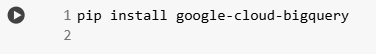
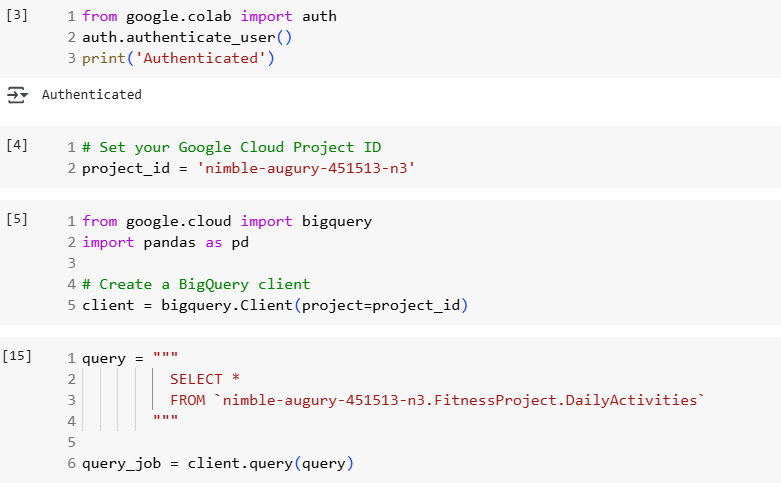
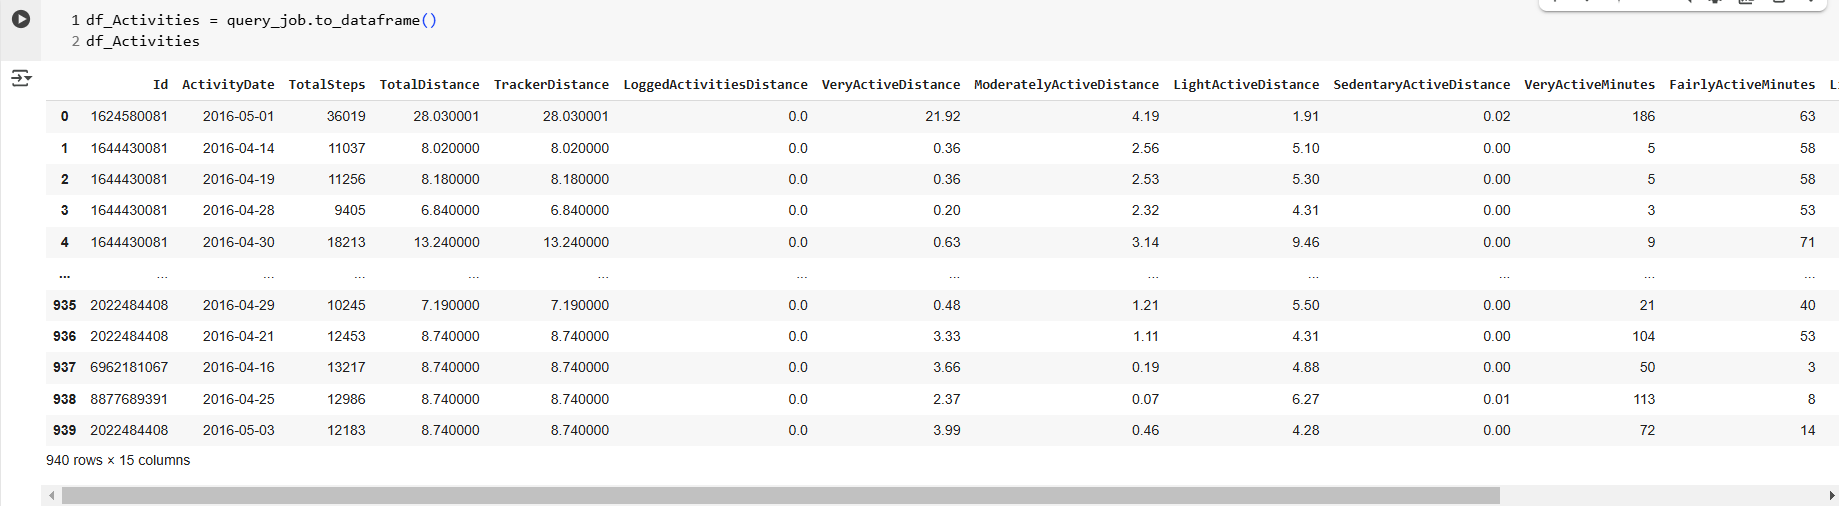
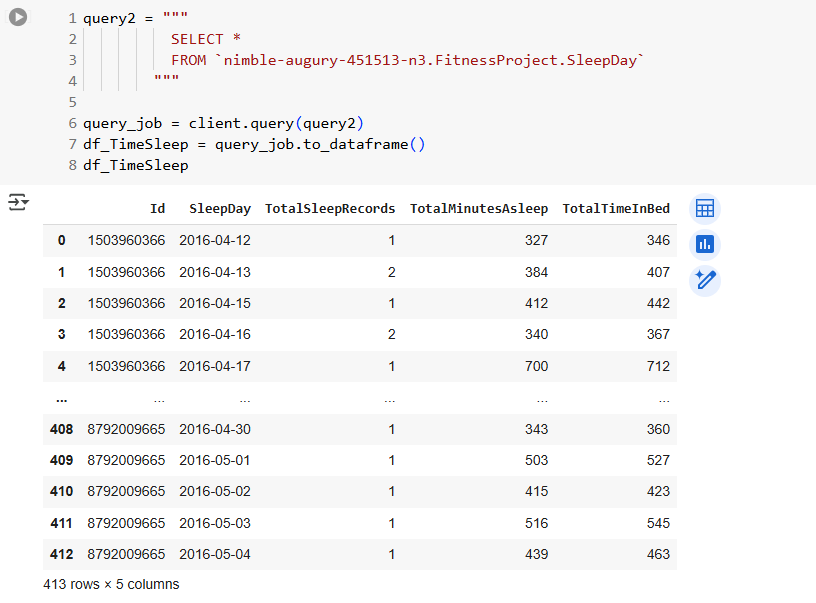
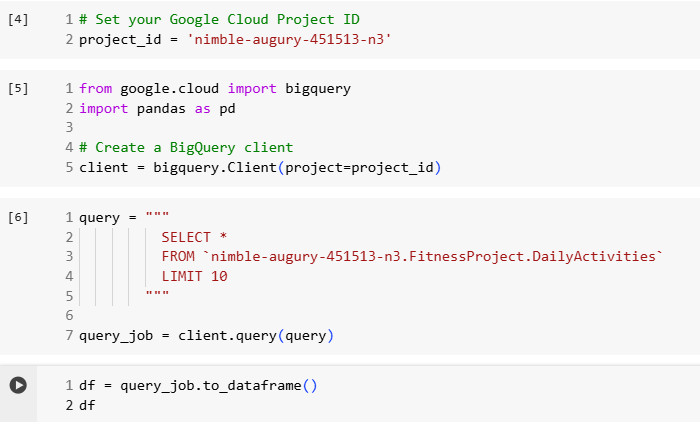
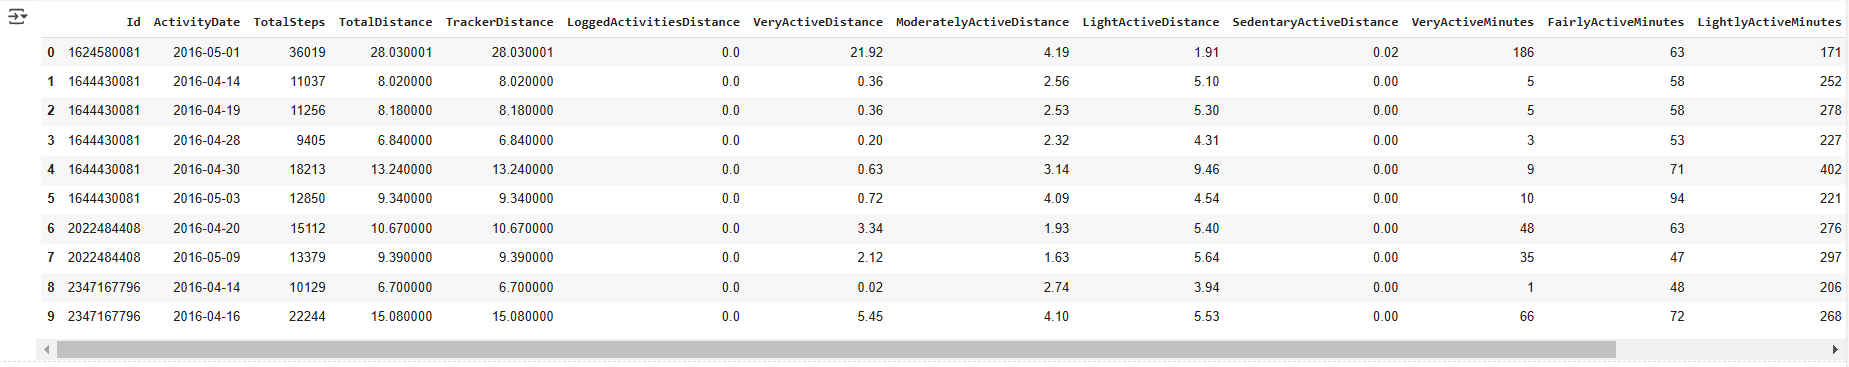
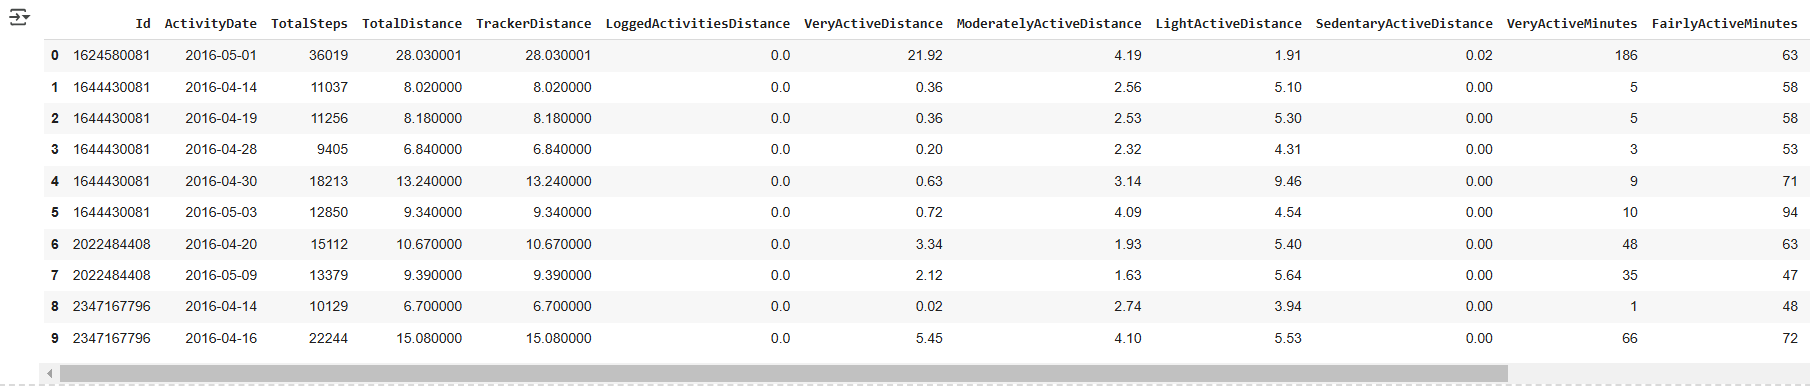

**Head - To see some columns and rows in table
Info - Check columns, datatype, range,...
Shape - To check quantity of row and column**

In [ ]:
df_Activities.head()
df_Activities.info()
df_Activities.shape


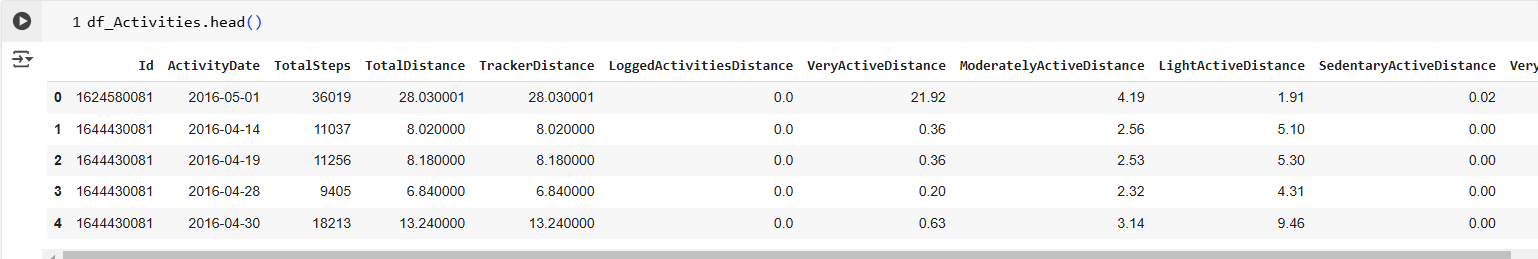

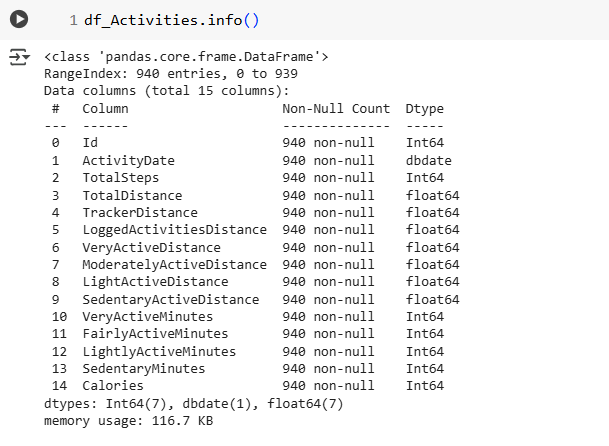

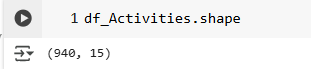
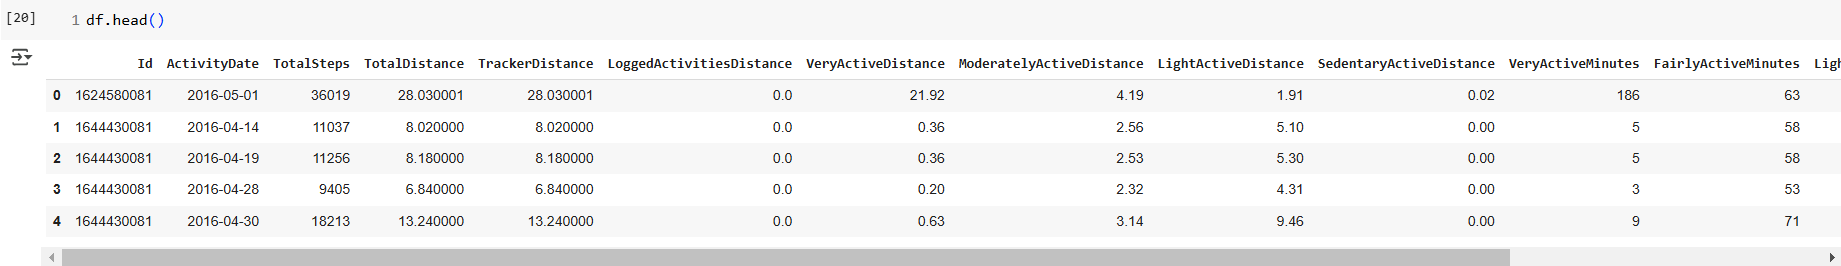

**Checking for duplicate rows, missing values, remove dupplicate, count removed and count total remaining**

In [ ]:
# Checking for duplicate rows 
duplicate_rows = df_Activities[df_Activities.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicate_rows}")

# Checking for missing values 
missing_values = df_Activities.isna().sum()
print("Missing values per column:\n", missing_values)

# Removing duplicate rows 
daily_activity = df_Activities.drop_duplicates()

#If you want to verify that the duplicates are really removed you can do:
num_duplicates_after_removal = df_Activities.duplicated().sum()
print(f"Total number of duplicate rows after removal: {num_duplicates_after_removal}")

#If you want to verify the number of rows after the removal
print(f"Number of rows after duplicate removal: {len(df_Activities)}")

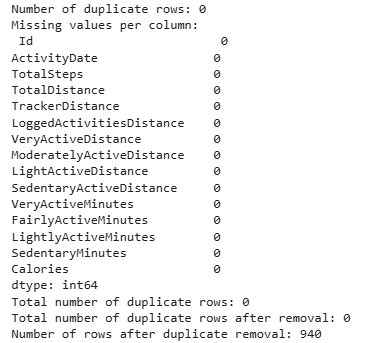

**Data is cleaned**

In [ ]:
import pandas as pd

# Convert 'ActivityDate' column to datetime objects
df_Activities['ActivityDate'] = pd.to_datetime(df_Activities['ActivityDate'], format='%m/%d/%Y')

# Create a new column with the desired m/d/y format
df_Activities['ActivityDate_mdy'] = df_Activities['ActivityDate'].dt.strftime('%m/%d/%Y')

# Display the DataFrame
df_Activities


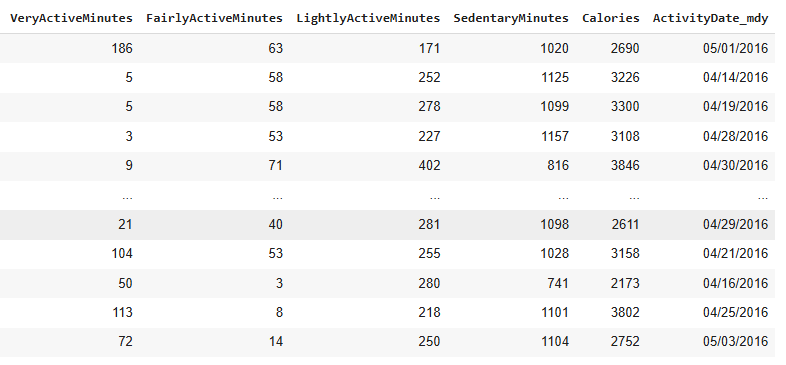

**Formated ActivityDate column to new m/d/y format by new column ActivityDate_mdy and drop old column and change name to new ActivityDate if need be**

In [ ]:
# Total active minutes
df_Activities['TotalActiveMinutes'] = df_Activities['VeryActiveMinutes'] + df_Activities['FairlyActiveMinutes'] + df_Activities['LightlyActiveMinutes']

# Workout minutes
df_Activities['WorkoutMinutes'] = df_Activities['VeryActiveMinutes'] + df_Activities['FairlyActiveMinutes']

# Seating minutes
df_Activities['SeatingMinutes'] = df_Activities['SedentaryMinutes']

# Walking minutes
df_Activities['WalkingMinutes'] = df_Activities['LightlyActiveMinutes']

# Walking distance
df_Activities['WalkingDistance'] = df_Activities['LightActiveDistance']

# Drop columns 
df_Activities = df_Activities.drop(columns=['LightActiveDistance', 'ModeratelyActiveDistance', 'VeryActiveDistance', 'LightlyActiveMinutes', 'SedentaryMinutes', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'TrackerDistance', 'LoggedActivitiesDistance'])

# Number of distinct IDs 
num_distinct_ids = df_Activities['Id'].nunique()
print(f"Number of distinct IDs: {num_distinct_ids}")

df_Activities

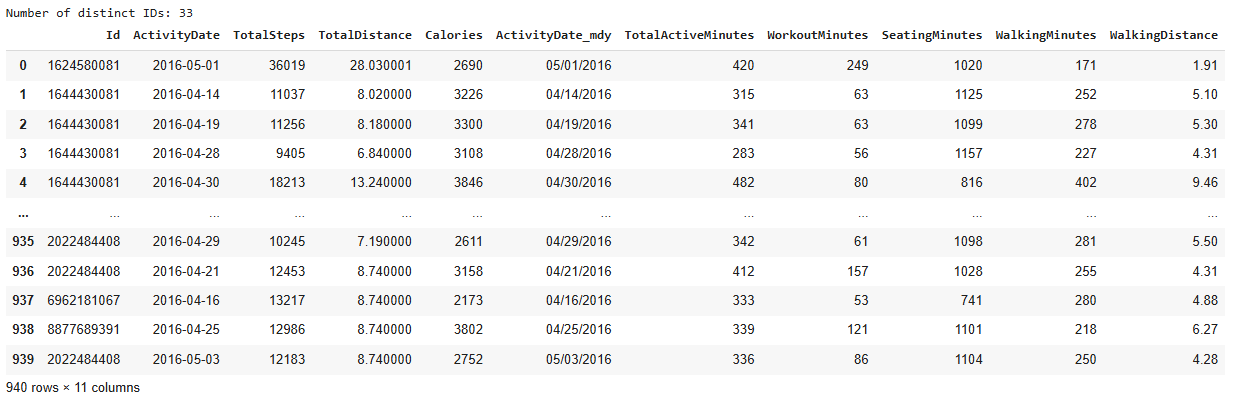

In [ ]:
# Write the DataFrame to a CSV file
df_Activities.to_csv("cleaned_dailyActivity.csv", index=False)

# Read the CSV file into a new DataFrame
daily_activity_cleaned = pd.read_csv("cleaned_dailyActivity.csv")

# Convert 'ActivityDate' to datetime and extract weekday name
daily_activity_cleaned['ActivityDate'] = pd.to_datetime(daily_activity_cleaned['ActivityDate'])
daily_activity_cleaned['Weekday'] = daily_activity_cleaned['ActivityDate'].dt.day_name()

daily_activity_cleaned

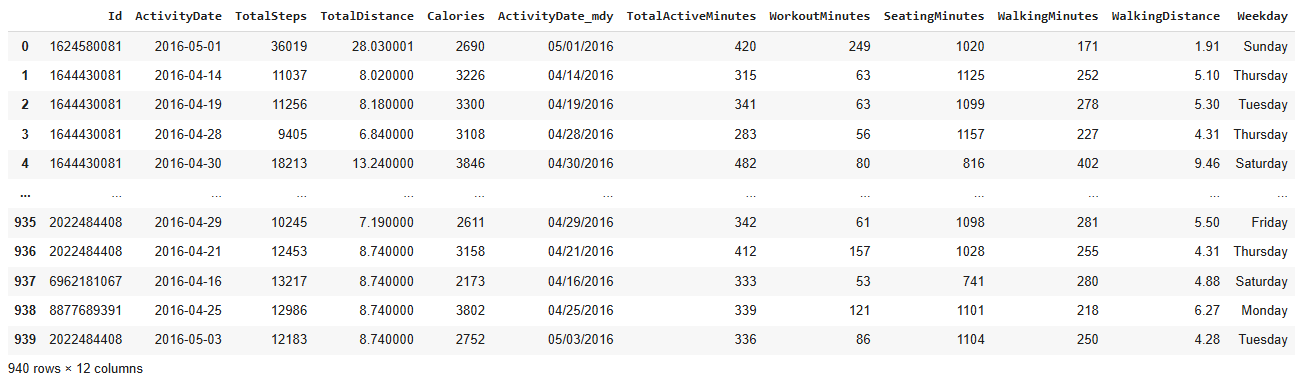

In [ ]:
# Convert 'SleepDay' column to datetime objects
df_TimeSleep['SleepDay'] = pd.to_datetime(df_TimeSleep['SleepDay'], format='%m/%d/%Y')

# Create a new column with the desired m/d/y format
df_TimeSleep['SleepDay_mdy'] = df_TimeSleep['SleepDay'].dt.strftime('%m/%d/%Y')

# Display the DataFrame
df_TimeSleep

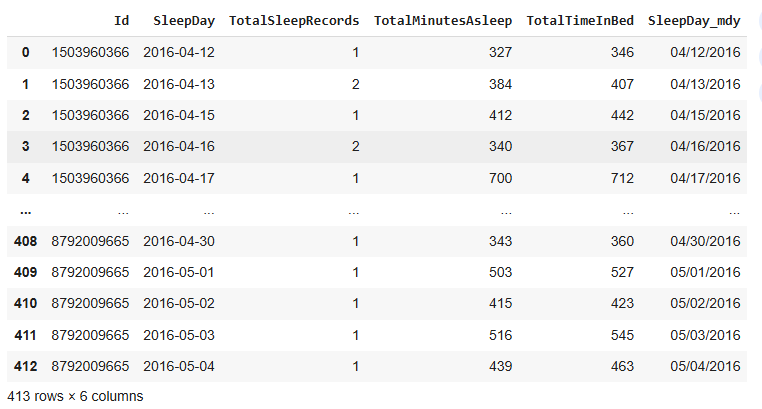

In [ ]:
# Total active minutes
df_TimeSleep['TimeBetweenSleepAndOnBed'] = df_TimeSleep['TotalTimeInBed'] - df_TimeSleep['TotalMinutesAsleep']

# Number of distinct IDs 
num_distinct_ids = df_TimeSleep['Id'].nunique()
print(f"Number of distinct IDs: {num_distinct_ids}")

df_TimeSleep

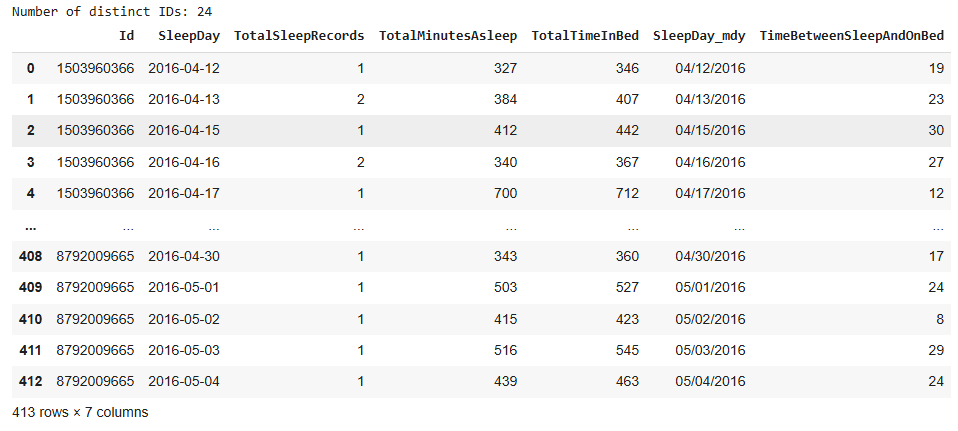

# Analyse Phase

Let's explore patterns, trends, and relationships in the data. Start by getting an overview of the dataset and correlation.

* +1 → Perfect positive correlation (as one increases, the other increases).
 * -1 → Perfect negative correlation (as one increases, the other decreases).
* 0 → No correlation (no relationship between the two variables).

In [ ]:
# Summary statistics (equivalent to summary() in R)
print(daily_activity_cleaned.describe())

# Correlation between numerical variables (equivalent to cor() in R)
numerical_data = daily_activity_cleaned.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_data.corr(method='pearson')  # Calculate correlation matrix
print("\nCorrelation Matrix:\n", correlation_matrix)

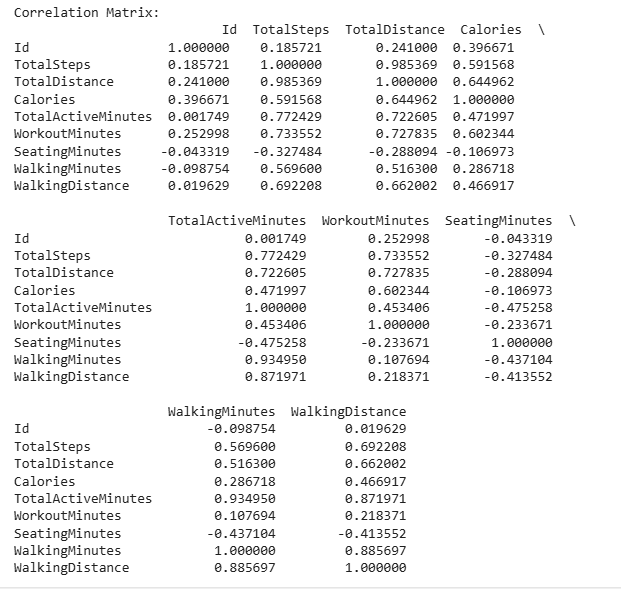

    Strong Positive Correlations:

TotalSteps and TotalDistance (0.985): As expected, the number of steps taken is almost perfectly correlated with the total distance covered. TotalActiveMinutes and WalkingMinutes (0.935): More active minutes strongly correlate with walking minutes, indicating that walking is a major contributor to total activity time. WalkingMinutes and WalkingDistance (0.886): More walking time naturally results in a greater walking distance. TotalActiveMinutes and WalkingDistance (0.872): More active time generally leads to covering more distance. Moderate Positive Correlations:

TotalSteps and Calories (0.592): More steps generally result in more calories burned, though other factors may also influence calorie expenditure. WorkoutMinutes and Calories (0.602): Longer workout durations tend to lead to higher calorie burn. TotalActiveMinutes and Calories (0.472): More activity contributes to calorie burn, though the correlation is not as strong as with steps or workouts. WalkingMinutes and Calories (0.287): Walking contributes to calorie expenditure but not as significantly as other activities. Negative Correlations:

SeatingMinutes and TotalActiveMinutes (-0.475): More time spent sitting reduces total active minutes. SeatingMinutes and WalkingMinutes (-0.437): More sitting means less time spent walking. SeatingMinutes and WalkingDistance (-0.414): More sitting results in covering less walking distance. SeatingMinutes and WorkoutMinutes (-0.234): Though weak, this suggests that people who sit more tend to work out less. Conclusion: Steps, distance, and activity time are strongly linked, as expected. Walking contributes significantly to overall activity time but less so to calorie burn. Sitting time negatively impacts activity levels, particularly walking and total active minutes. Calories burned are influenced by steps, workout time, and overall active minutes, but other factors (like exercise intensity and metabolism) likely play a role.

Let's identify Trends and Patterns.

Do higher step counts lead to higher calorie burn? Are there any trends over time (e.g., do some days have lower activity)? Are users sedentary for long hours, and does that impact calories burned?

In [ ]:
def summarize_weekly_data(daily_activity_cleaned):
    """
    Summarizes daily activity data by day of the week.

    Args:
        daily_activity_cleaned (pd.DataFrame): DataFrame containing daily activity data.
                                               Must include 'ActivityDate', 'TotalSteps', 
                                               'Calories', 'TotalActiveMinutes', 'WorkoutMinutes',
                                               'WalkingMinutes', 'SeatingMinutes', 'WalkingDistance'.

    Returns:
        pd.DataFrame: DataFrame summarizing activity data by day of the week.
    """

    # Ensure ActivityDate is datetime
    daily_activity_cleaned['ActivityDate'] = pd.to_datetime(daily_activity_cleaned['ActivityDate']).dt.date

    # Create Weekday column
    daily_activity_cleaned['Weekday'] = pd.to_datetime(daily_activity_cleaned['ActivityDate']).dt.day_name()

    # Group and summarize
    weekly_summary = daily_activity_cleaned.groupby('Weekday').agg(
        avg_steps=('TotalSteps', 'mean'),
        avg_calories=('Calories', 'mean'),
        avg_active_minutes=('TotalActiveMinutes', 'mean'),
        avg_workout_minutes=('WorkoutMinutes', 'mean'),
        avg_walking_minutes=('WalkingMinutes', 'mean'),
        avg_seating_minutes=('SeatingMinutes', 'mean'),
        avg_walking_distance=('WalkingDistance', 'mean'),
        Count_FitBit_usage=('ActivityDate', 'count')
    ).reset_index()

    # Reorder weekdays to standard order
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekly_summary['Weekday'] = pd.Categorical(weekly_summary['Weekday'], categories=days_order, ordered=True)
    weekly_summary = weekly_summary.sort_values('Weekday').reset_index(drop=True)

    return weekly_summary

In [ ]:
def plot_activity_metrics_by_weekday(daily_activity_cleaned):
    """
    Creates a facet plot of activity metrics by weekday using boxplots.

    Args:
        daily_activity_cleaned (pd.DataFrame): DataFrame containing daily activity data.
                                               Must include 'Weekday', 'TotalSteps', 'Calories',
                                               'TotalActiveMinutes', 'WorkoutMinutes',
                                               'WalkingMinutes', 'SeatingMinutes', 'WalkingDistance'.
    """

    # Convert Weekday to categorical with specified order
    days_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    daily_activity_cleaned['Weekday'] = pd.Categorical(daily_activity_cleaned['Weekday'], categories=days_order, ordered=True)

    # Reshape data for faceting
    daily_activity_long = pd.melt(daily_activity_cleaned,
                                  id_vars=['Weekday'],
                                  value_vars=['TotalSteps', 'Calories', 'TotalActiveMinutes',
                                              'WorkoutMinutes', 'WalkingMinutes', 'SeatingMinutes',
                                              'WalkingDistance'],
                                  var_name='Metric',
                                  value_name='Value')

    # Create a facet plot with boxplots
    g = sns.FacetGrid(daily_activity_long, col='Metric', col_wrap=2, sharey=False) # col_wrap to make the facets wrap to multiple rows.
    g.map(sns.boxplot, 'Weekday', 'Value', order=days_order, palette='viridis', fliersize=0, alpha=0.6) #fliersize=0 to remove outliers, viridis for colors
    g.set_titles(col_template="{col_name}") #set facet titles
    g.set_axis_labels("Weekday", "Value")
    g.set_xticklabels(rotation=45, ha='right') #rotate x axis labels
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle("Activity Metrics per Weekday") #set figure title
    plt.show()

In [ ]:
def plot_weekly_activity_metrics(weekly_summary):
    """
    Creates a facet plot of weekly activity metrics using lines.

    Args:
        weekly_summary (pd.DataFrame): DataFrame containing weekly summarized activity data.
                                        Must include 'Weekday' and other activity metric columns.
    """

    # Convert Weekday to categorical with specified order
    days_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
    weekly_summary['Weekday'] = pd.Categorical(weekly_summary['Weekday'], categories=days_order, ordered=True)

    # Reshape data for faceting
    weekly_summary_long = pd.melt(weekly_summary,
                                   id_vars=['Weekday'],
                                   var_name='Metric',
                                   value_name='Value')

    # Create a facet plot with lines
    g = sns.FacetGrid(weekly_summary_long, col='Metric', col_wrap=2, sharey=False) # col_wrap to make the facets wrap to multiple rows.
    g.map(sns.lineplot, 'Weekday', 'Value', marker='o', sort=False, color='steelblue') #sort=False to prevent sorting the x axis.
    g.set_titles(col_template="{col_name}") #set facet titles
    g.set_axis_labels("Weekday", "Value")
    g.set_xticklabels(rotation=45, ha='right') #rotate x axis labels
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle("Weekly Activity Metrics") #set figure title
    plt.show()

In [ ]:
def analyze_weekday_weekend_usage(weekly_summary):
    """
    Classifies weekdays vs. weekends and performs a t-test on 'Count_FitBit_usage'.

    Args:
        weekly_summary (pd.DataFrame): DataFrame containing weekly summarized activity data.
                                        Must include 'Weekday' and 'Count_FitBit_usage'.

    Returns:
        tuple: A tuple containing the t-statistic, p-value, and degrees of freedom.
    """

    # Define weekdays and weekends
    weekdays = ["Tuesday", "Wednesday", "Thursday"]
    weekends = ["Saturday", "Sunday", "Monday", "Friday"]

    # Add a new column to classify weekdays vs. weekends
    weekly_summary['Week_Type'] = weekly_summary['Weekday'].apply(lambda x: "Weekday" if x in weekdays else "Weekend")

    # Perform t-test for Count_FitBit_usage
    weekday_usage = weekly_summary[weekly_summary['Week_Type'] == 'Weekday']['Count_FitBit_usage']
    weekend_usage = weekly_summary[weekly_summary['Week_Type'] == 'Weekend']['Count_FitBit_usage']

    ttest_result = stats.ttest_ind(weekday_usage, weekend_usage)

    return ttest_result.statistic, ttest_result.pvalue, len(weekday_usage) + len(weekend_usage) - 2

In [ ]:
def analyze_weekday_weekend_workout(weekly_summary):
    """
    Classifies weekdays vs. weekends and performs a t-test on 'avg_workout_minutes'.

    Args:
        weekly_summary (pd.DataFrame): DataFrame containing weekly summarized activity data.
                                        Must include 'Weekday' and 'avg_workout_minutes'.

    Returns:
        tuple: A tuple containing the t-statistic, p-value, and degrees of freedom.
    """

    # Define weekdays and weekends
    weekdays = ["Wednesday", "Thursday", "Friday"]
    weekends = ["Saturday", "Sunday", "Monday", "Tuesday"]

    # Add a new column to classify weekdays vs. weekends
    weekly_summary['Week_Type'] = weekly_summary['Weekday'].apply(lambda x: "Weekday" if x in weekdays else "Weekend")

    # Perform t-test for avg_workout_minutes
    weekday_workout = weekly_summary[weekly_summary['Week_Type'] == 'Weekday']['avg_workout_minutes']
    weekend_workout = weekly_summary[weekly_summary['Week_Type'] == 'Weekend']['avg_workout_minutes']

    ttest_result = stats.ttest_ind(weekday_workout, weekend_workout)

    return ttest_result.statistic, ttest_result.pvalue, len(weekday_workout) + len(weekend_workout) - 2

Let's identify Trends and Patterns.

Do higher step counts lead to higher calorie burn?
Are there any trends over time (e.g., do some days have lower activity)?
Are users sedentary for long hours, and does that impact calories burned?

# Share phase
Key Findings

Strong Correlations:
Steps & Distance: Almost perfect correlation (r ≈ 0.985) confirms that more steps translate directly into greater distance covered.

Active & Walking Minutes: High correlation (r ≈ 0.935) indicates that walking is a major component of daily activity.

Calorie Burn: Moderately correlated with steps and workout minutes, suggesting that longer or more intense activities lead to higher energy expenditure.

Weekday Trends:
Mid-Week Engagement: Tuesday, Wednesday, and Thursday show higher average steps, active minutes, and calorie burn.

Sedentary Behavior: Negative correlations exist between sedentary minutes and both active and walking minutes, reinforcing that increased sitting time is associated with reduced overall activity.

Statistical Significance:
T-tests revealed significant differences in usage patterns and workout minutes between weekday and weekend groups, underlining that user behavior changes by day.

In [ ]:
def plot_steps_calories(daily_activity_cleaned):
    """
    Creates a scatter plot showing the relationship between Total Steps and Calories Burned.

    Args:
        daily_activity_cleaned (pd.DataFrame): DataFrame containing daily activity data.
                                               Must include 'TotalSteps' and 'Calories'.
    """

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='TotalSteps', y='Calories', data=daily_activity_cleaned, color='blue')
    plt.title('Total Steps vs Calories Burned')
    plt.xlabel('Total Steps')
    plt.ylabel('Calories Burned')
    plt.grid(False) #theme_minimal equivalent
    plt.show()

def plot_active_calories(daily_activity_cleaned):
    """
    Creates a scatter plot showing the relationship between Total Active Minutes and Calories Burned.

    Args:
        daily_activity_cleaned (pd.DataFrame): DataFrame containing daily activity data.
                                               Must include 'TotalActiveMinutes' and 'Calories'.
    """

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='TotalActiveMinutes', y='Calories', data=daily_activity_cleaned, color='blue')
    plt.title('Total Active Minutes vs Calories Burned')
    plt.xlabel('Total Active Minutes')
    plt.ylabel('Calories Burned')
    plt.grid(False) #theme_minimal equivalent
    plt.show()

In [ ]:
def plot_weekly_percentages(weekly_summary):
    """
    Calculates percentages and creates bar plots for workout minutes and FitBit usage.

    Args:
        weekly_summary (pd.DataFrame): DataFrame containing weekly summarized activity data.
                                        Must include 'Weekday', 'avg_workout_minutes', and 'Count_FitBit_usage'.
    """

    # Calculate percentages
    weekly_summary['percent_avg_workout_minutes'] = (weekly_summary['avg_workout_minutes'] / weekly_summary['avg_workout_minutes'].sum()) * 100
    weekly_summary['percent_Count_FitBit_usage'] = (weekly_summary['Count_FitBit_usage'] / weekly_summary['Count_FitBit_usage'].sum()) * 100
    weekly_summary['percent_avg_calories'] = (weekly_summary['avg_calories'] / weekly_summary['avg_calories'].sum()) * 100

    # Bar Plot for Workout Minutes Percentage
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Weekday', y='percent_avg_workout_minutes', data=weekly_summary, alpha=0.7,
                palette=['#B0B0B0', '#B0B0B0', '#8da0cb', '#e78ac3', '#fc8d62', '#B0B0B0', '#B0B0B0'],
                order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    for index, value in enumerate(weekly_summary['percent_avg_workout_minutes']):
        plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', size=10)
    plt.title('Percentage of Workout Minutes by Weekday')
    plt.xlabel('Weekday')
    plt.ylabel('Percentage of Workout Minutes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Bar Plot for FitBit Usage Percentage
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Weekday', y='percent_Count_FitBit_usage', data=weekly_summary, alpha=0.7,
                palette=['#B0B0B0', '#fc8d62', '#8da0cb', '#e78ac3', '#B0B0B0', '#B0B0B0', '#B0B0B0'],
                order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    for index, value in enumerate(weekly_summary['percent_Count_FitBit_usage']):
        plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', size=10)
    plt.title('Percentage of FitBit Usage by Weekday')
    plt.xlabel('Weekday')
    plt.ylabel('Percentage of FitBit Usage')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Act phase

    Strategy Recommendations

- Focus on Midweek Campaigns:
    + Seeing higher engagement on Tuesdays through Thursdays, Bellabeat should optimize digital marketing efforts (e.g., social media ads, email marketing, app notifications) during the midweek to reach users when they are most active.
    + Encourage users to participate in challenges or promotions specifically designed for midweek days, to maintain or increase their activity levels, in line with natural behavioral tendencies.
- Emphasize Activity Tracking:
    + Given the strong correlation between steps, distance, and active time, Bellabeat should focus on integrating these metrics into product features.
    + For example, improve the dashboard to provide actionable insights during the midweek, attracting users looking for more comprehensive health tracking.
- Promote Calorie Tracking and Exercise:
    + Since calories burned are correlated to exercise time, marketing messages that emphasize personalized exercise plans and calorie tracking can appeal to health-conscious consumers.
- Address Sedentary Behavior:
    + With sitting time clearly inversely correlated to overall activity, Bellabeat could incorporate “activity break” reminders or tips for reducing sitting time, not only encouraging movement but also supporting overall health.
- Data-Driven Product Innovation:
    + Use insights from Fitbit data as a starting point to explore how Bellabeat products can fill gaps in the market.
    + For example, introduce features that specifically cater to mid-week activity spikes or create product bundles that encourage continued engagement throughout the week.
- Adding New Data:
    + Recognizing the limitations of the current dataset (small sample size, outdated, and lack of demographic details), Bellabeat should consider investing in new, more comprehensive research to validate these trends and further refine product features and marketing strategies.

    Data Limitations & Next Steps

 - Representativeness:
The small sample size and age of the dataset (2016) means that trends may not fully reflect current or broader consumer behavior.

 - Additional Research:
Additional, updated data sources—ideally with broader demographic coverage—should be integrated to validate and enrich these insights before making large-scale strategic changes.

    Conclusion

Midweek Focus Campaigns:
Given that activity levels are higher Tuesday through Thursday, marketing initiatives launched midweek can drive user engagement.

Product Feature Enhancements:
Emphasizing integrated activity tracking—particularly for steps, distance, and exercise metrics—can meet consumer needs.

Addressing Sedentary Behavior:
Implementing reminders and health promotion can help counteract the negative effects of prolonged sitting.